In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error,r2_score,accuracy_score


In [2]:
t_df = pd.read_csv("test.csv")

<Axes: >

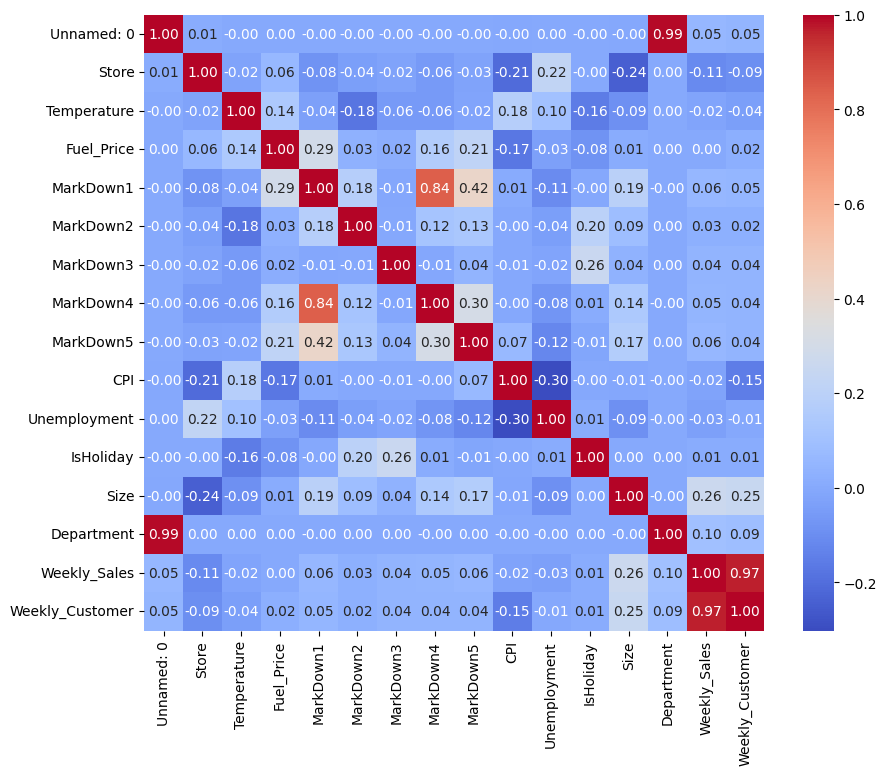

In [3]:
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(t_df.drop('Date', axis=1).corr(),annot=True,fmt=".2f",cmap='coolwarm')

In [4]:
t_df['timestamp'] = pd.to_datetime(t_df['Date'],format="%d/%m/%Y").astype('int64') / 10**9
print(t_df['timestamp'])

0         1.265328e+09
1         1.265933e+09
2         1.266538e+09
3         1.267142e+09
4         1.267747e+09
              ...     
521230    1.348790e+09
521231    1.349395e+09
521232    1.350000e+09
521233    1.350605e+09
521234    1.351210e+09
Name: timestamp, Length: 521235, dtype: float64


In [5]:
X = t_df[["timestamp","Store","Department","Temperature","Fuel_Price","MarkDown1","MarkDown2","MarkDown3","MarkDown4","Unemployment","IsHoliday"]]
Y = t_df[["Weekly_Sales"]]

In [74]:

# X = t_df[["Store","timestamp","IsHoliday"]]
# Y = t_df[["Weekly_Sales"]]

0         1.265328e+09
1         1.265933e+09
2         1.266538e+09
3         1.267142e+09
4         1.267747e+09
              ...     
521230    1.348790e+09
521231    1.349395e+09
521232    1.350000e+09
521233    1.350605e+09
521234    1.351210e+09
Name: timestamp, Length: 521235, dtype: float64


In [6]:
X.shape,Y.shape

((521235, 11), (521235, 1))

In [7]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.1)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((469111, 11), (52124, 11), (469111, 1), (52124, 1))

-----------    RandomForestRegressor    --------------

In [8]:
model = RandomForestRegressor(n_estimators=100,random_state=40)

In [9]:
result = model.fit(x_train,y_train)
y_pred = model.predict(x_test)
# print(y_pred)
# print("y_predict--",len(y_pred))
# print(y_test)
# print("y_test--",len(y_test))
#print(x_test)

c:\Users\M8470441\Documents\Guvi\Project\Final_project\.venv\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [10]:
print("predict--",type(y_pred))

print("Test--",type(y_test))

predict-- <class 'numpy.ndarray'>
Test-- <class 'pandas.core.frame.DataFrame'>


In [11]:
y_test_1d = y_test['Weekly_Sales'].values
y_predict_1d = y_pred.flatten()

df_test = pd.DataFrame({'y_test': y_test_1d})
df_predict = pd.DataFrame({'y_predict': y_predict_1d})

df_combined = pd.concat([df_test, df_predict], axis=1)

In [12]:

df_combined.to_csv('verification.csv', index=False)

In [24]:
# result_1.to_csv("check.csv")

In [13]:
y_test.shape,y_pred.shape

((52124, 1), (52124,))

In [14]:
mean_squared_error(y_test,y_pred)

15680371.030192314

In [15]:
Mean_val = mean_squared_error(y_test,y_pred)/len(y_pred)
print(Mean_val)

300.82823709217087


In [16]:
mean_absolute_error(y_test,y_pred)

1392.0758724100222

In [18]:
r2_val = r2_score(y_test,y_pred)
print(r2_val)

0.9655152431722294


-----------    GradientBoostingRegressor    --------------

In [19]:
from sklearn.ensemble import GradientBoostingRegressor
model_2 = GradientBoostingRegressor(n_estimators=100, random_state=40)


In [20]:
result_2 = model_2.fit(x_train,y_train)
y_pred_2 = model_2.predict(x_test)
# print(y_pred_2)
# print("y_predict--",len(y_pred_2))
# print(y_test)
# print("y_test--",len(y_test))

c:\Users\M8470441\Documents\Guvi\Project\Final_project\.venv\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [21]:
r2_score(y_test,y_pred_2)

0.624747340780901

-----------    CatBoostRegressor    --------------

In [22]:
from catboost import CatBoostRegressor
model_3 = CatBoostRegressor(n_estimators=100, random_state=42)

In [23]:
result_3 = model_3.fit(x_train,y_train)
y_pred_3 = model_3.predict(x_test)

Learning rate set to 0.5
0:	learn: 18826.5902926	total: 199ms	remaining: 19.7s
1:	learn: 17090.3035792	total: 264ms	remaining: 12.9s
2:	learn: 16102.5075034	total: 319ms	remaining: 10.3s
3:	learn: 15634.5424153	total: 383ms	remaining: 9.2s
4:	learn: 15216.6102186	total: 436ms	remaining: 8.29s
5:	learn: 14519.6329957	total: 495ms	remaining: 7.75s
6:	learn: 14252.8591313	total: 573ms	remaining: 7.61s
7:	learn: 14084.1797885	total: 646ms	remaining: 7.43s
8:	learn: 13795.2729561	total: 699ms	remaining: 7.07s
9:	learn: 13449.1175083	total: 744ms	remaining: 6.69s
10:	learn: 13280.5447019	total: 781ms	remaining: 6.32s
11:	learn: 13074.9938693	total: 815ms	remaining: 5.98s
12:	learn: 12777.5879086	total: 849ms	remaining: 5.68s
13:	learn: 12561.2084266	total: 890ms	remaining: 5.46s
14:	learn: 12392.9736504	total: 938ms	remaining: 5.31s
15:	learn: 12307.5649713	total: 978ms	remaining: 5.13s
16:	learn: 12060.8551083	total: 1.02s	remaining: 4.97s
17:	learn: 11909.5557446	total: 1.05s	remaining: 4.

In [82]:
r2_score(y_test,y_pred_3)

0.8592542183897474

***************   Markdown effects ***************

In [119]:
m_df = pd.read_csv("test.csv")
selected_columns = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'IsHoliday']
df_selected = m_df[selected_columns]

In [120]:
holiday_markdowns = df_selected[df_selected['IsHoliday'] == 1].drop('IsHoliday', axis=1)
non_holiday_markdowns = df_selected[df_selected['IsHoliday'] == 0].drop('IsHoliday', axis=1)

In [121]:
avg_holiday_markdowns = holiday_markdowns.mean()
avg_non_holiday_markdowns = non_holiday_markdowns.mean()

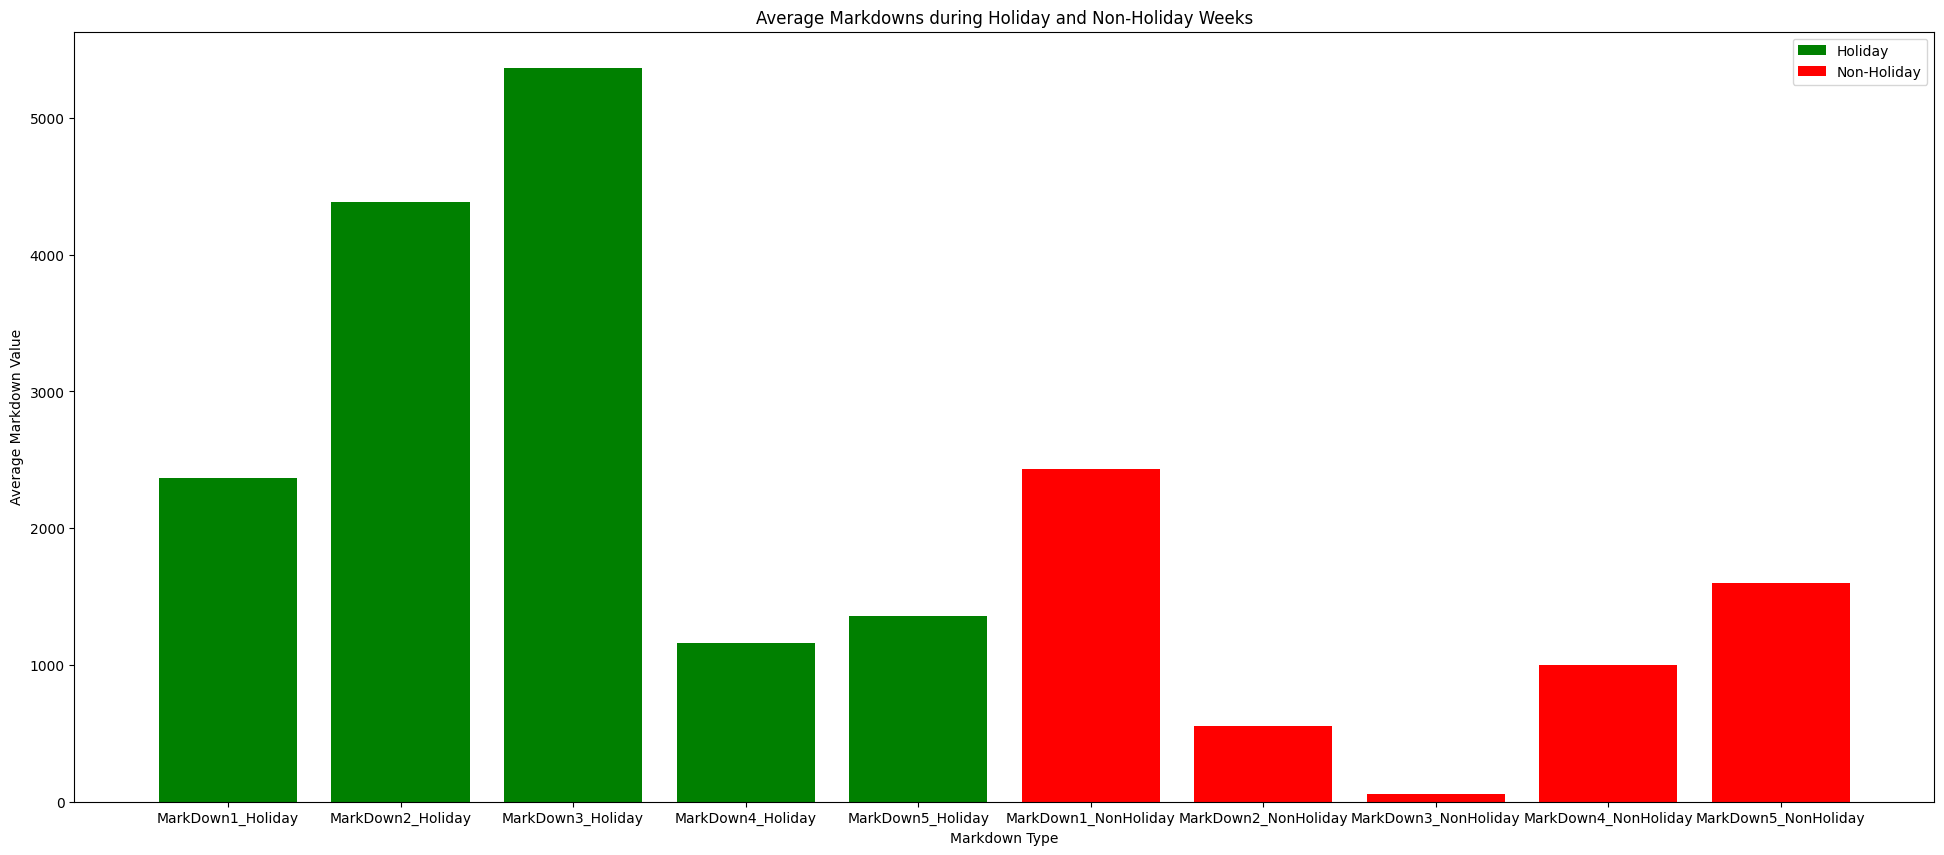

In [131]:
plt.figure(figsize=(24, 10))
plt.bar(avg_holiday_markdowns.index + "_Holiday", avg_holiday_markdowns, label='Holiday', color='green')
plt.bar(avg_non_holiday_markdowns.index + "_NonHoliday", avg_non_holiday_markdowns, label='Non-Holiday', color='red')
plt.title('Average Markdowns during Holiday and Non-Holiday Weeks')
plt.xlabel('Markdown Type')
plt.ylabel('Average Markdown Value')
plt.legend()
plt.show()

**************  Temperature vs. Weekly Sales  ***************

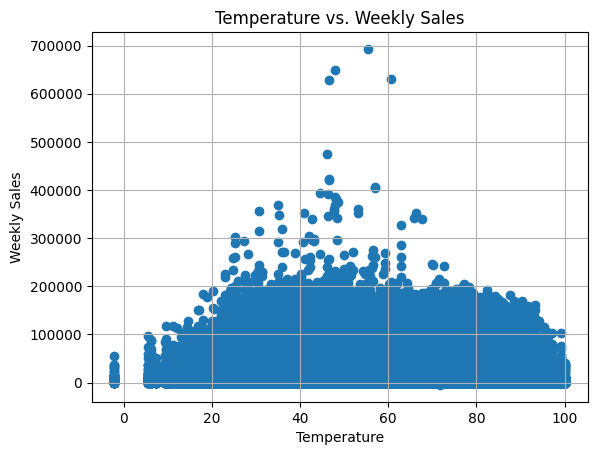

In [136]:
plt.scatter(m_df['Temperature'], m_df['Weekly_Sales'],alpha=1)
plt.title('Temperature vs. Weekly Sales')
plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')
plt.grid(True)
plt.show()

Sales are not significantly impacted when the temperature falls within the range of 20 to 90.

**************  Fuel Price vs Weekly Sales  ***************

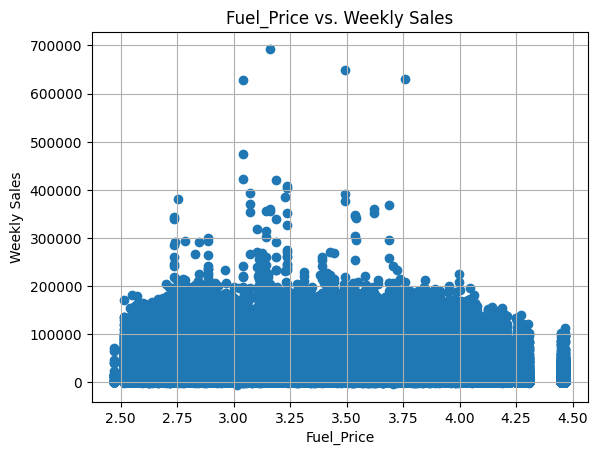

In [137]:
plt.scatter(m_df['Fuel_Price'], m_df['Weekly_Sales'],alpha=1)
plt.title('Fuel_Price vs. Weekly Sales')
plt.xlabel('Fuel_Price')
plt.ylabel('Weekly Sales')
plt.grid(True)
plt.show()

Sales are not significantly affected when fuel prices fall within the range of 2.75 to 4.00

**************  Unemployment vs Weekly Sales  ***************

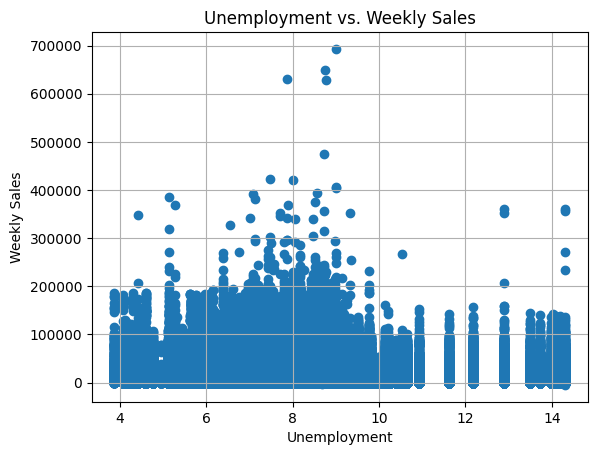

In [139]:
plt.scatter(m_df['Unemployment'], m_df['Weekly_Sales'],alpha=1)
plt.title('Unemployment vs. Weekly Sales')
plt.xlabel('Unemployment')
plt.ylabel('Weekly Sales')
plt.grid(True)
plt.show()

In [ ]:
Unemployment has a limited impact on sales, with noticeable effects occurring within the range of 4% to 10%, where some minimal changes in sales are observed.

In [ ]:
**************  Department Size vs Weekly Sales  ***************

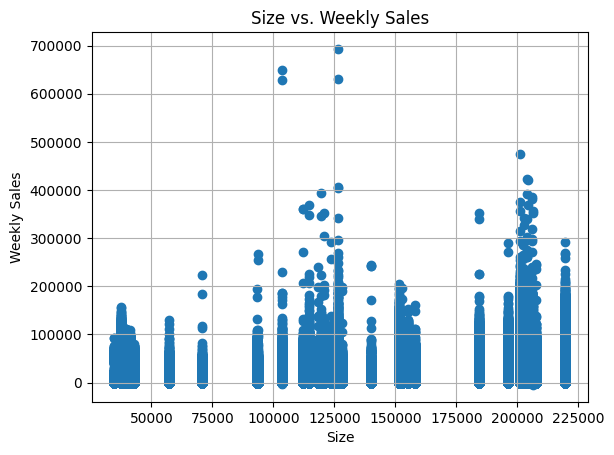

In [141]:
plt.scatter(m_df['Size'], m_df['Weekly_Sales'],alpha=1)
plt.title('Size vs. Weekly Sales')
plt.xlabel('Size')
plt.ylabel('Weekly Sales')
plt.grid(True)
plt.show()

A slight increase in the size of the store corresponds to a minimal rise in sales.

Convert the Model to Pickel file

In [24]:
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [25]:
with open('model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [26]:
predictions = loaded_model.predict(x_test)
print(predictions)

[   26.7267 14923.0924 17424.5834 ... 11719.8065  7372.4822  2453.5682]


In [27]:
# import joblib
# joblib.dump(model, 'model.joblib')

['model.joblib']